In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [31]:

df = pd.read_excel("breast cancer detection classification.xlsx")

In [32]:
df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [33]:
df.columns


Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis'],
      dtype='object')

In [34]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [35]:
df.isnull().values.any()


np.False_

In [36]:
df.drop('id', axis=1,inplace=True)

In [37]:
df.shape

(569, 31)

In [38]:
df.duplicated().sum()

np.int64(0)

In [39]:
df.nunique()

radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
diagnosis                    2
dtype: int64

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [40]:
num=df.select_dtypes(include=['int64','float64']).columns
num

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis'],
      dtype='object')

In [41]:
num = df[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
          'smoothness_mean', 'compactness_mean', 'concavity_mean',
          'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
          'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
          'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
          'fractal_dimension_se', 'radius_worst', 'texture_worst',
          'perimeter_worst', 'area_worst', 'smoothness_worst',
          'compactness_worst', 'concavity_worst', 'concave points_worst',
          'symmetry_worst', 'fractal_dimension_worst']]

In [42]:
labelencoder = LabelEncoder()
df['diagnosis'] = labelencoder.fit_transform(df['diagnosis'])

In [43]:
X = num  
y = df['diagnosis']  

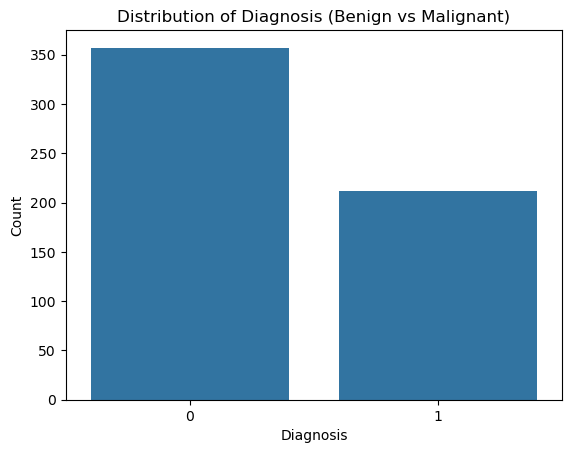

In [45]:

sns.countplot(x=df['diagnosis'])
plt.title("Distribution of Diagnosis (Benign vs Malignant)")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.show()


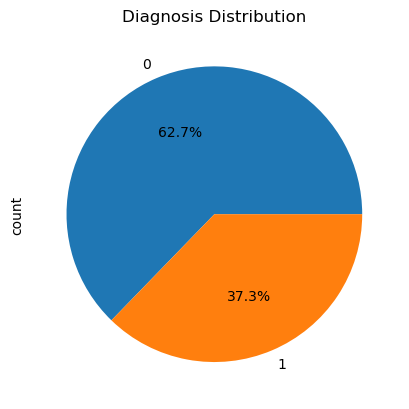

In [47]:
df['diagnosis'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Diagnosis Distribution")
plt.show()

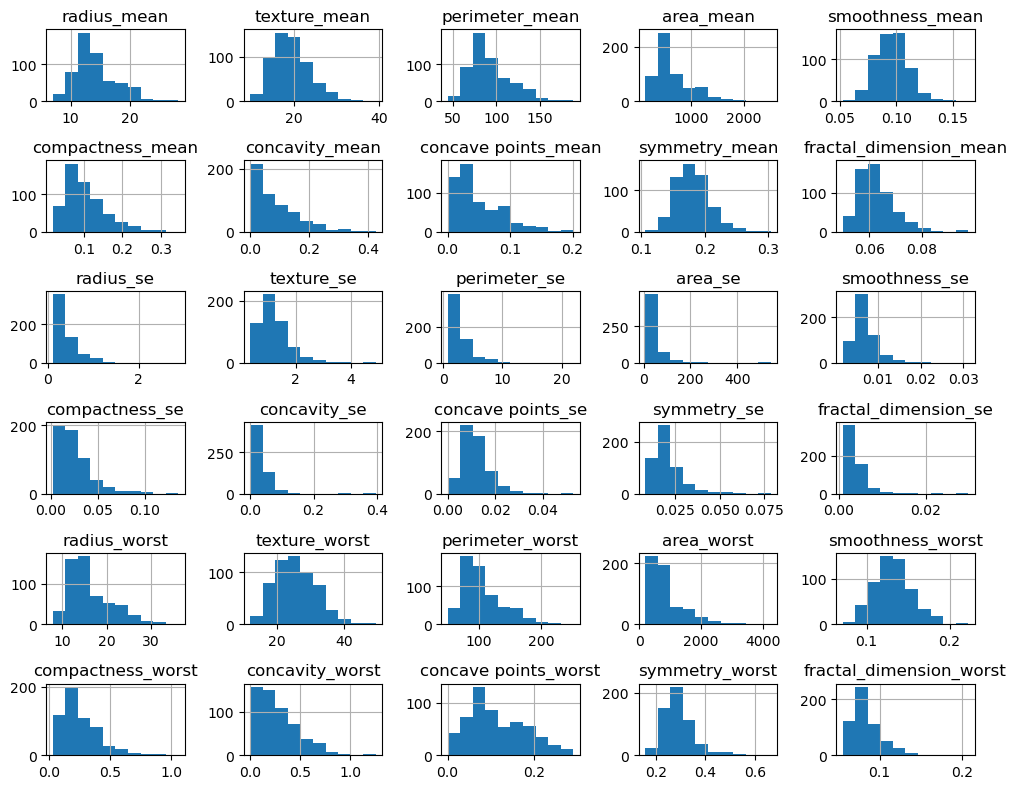

In [48]:
num.hist(figsize=(10, 8))  
plt.tight_layout()          
plt.show()

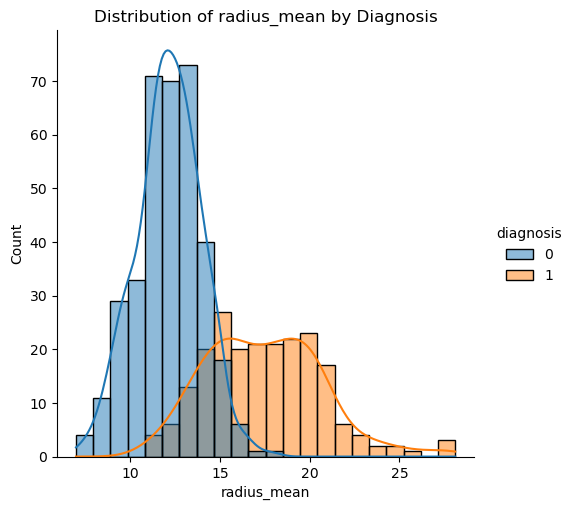

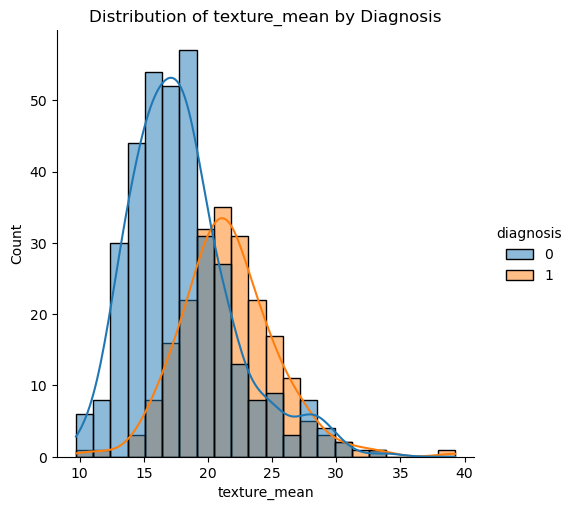

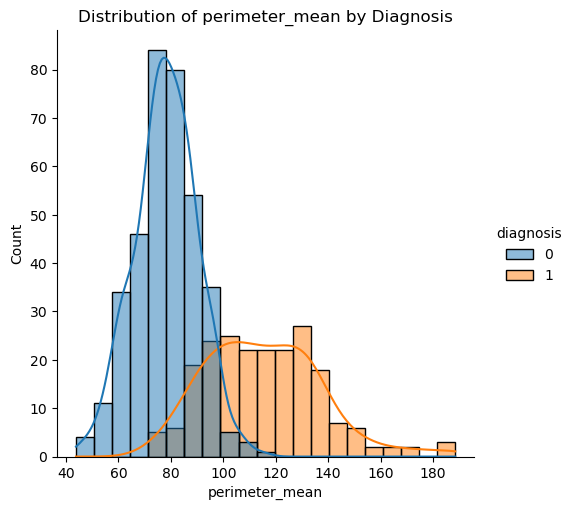

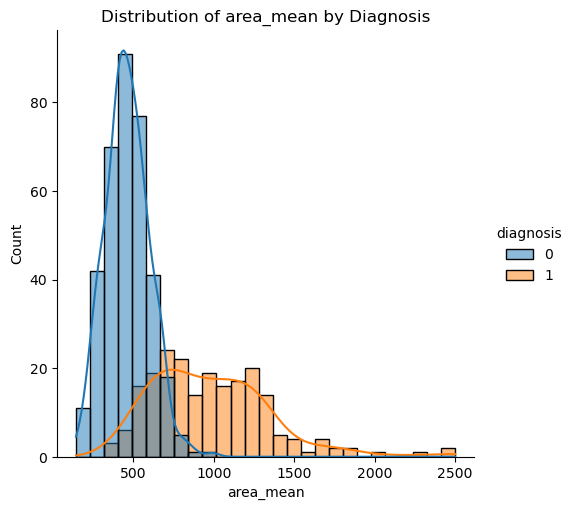

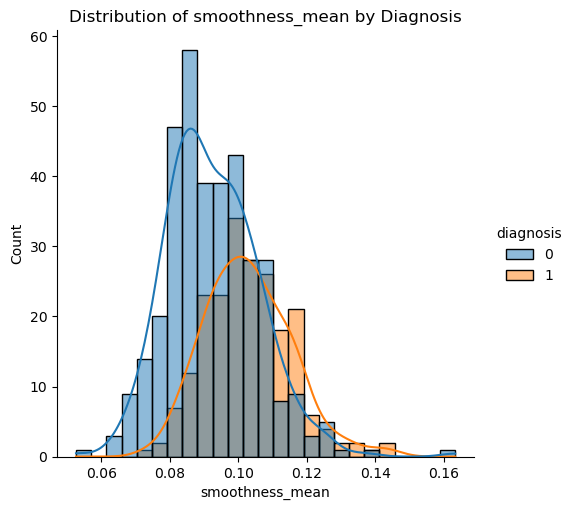

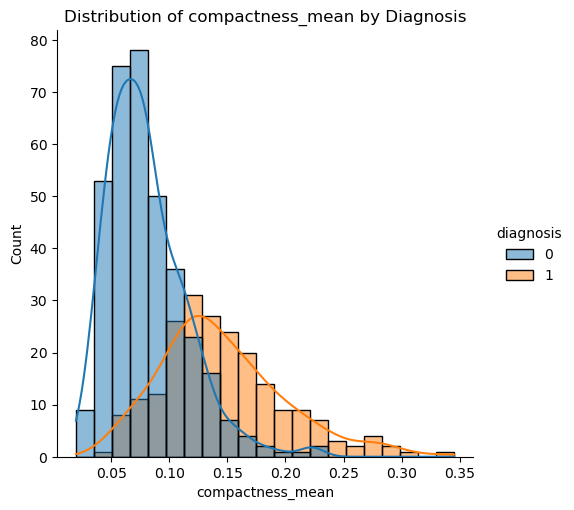

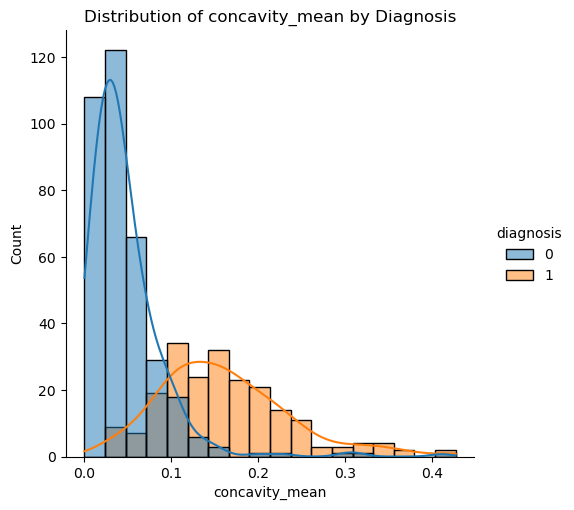

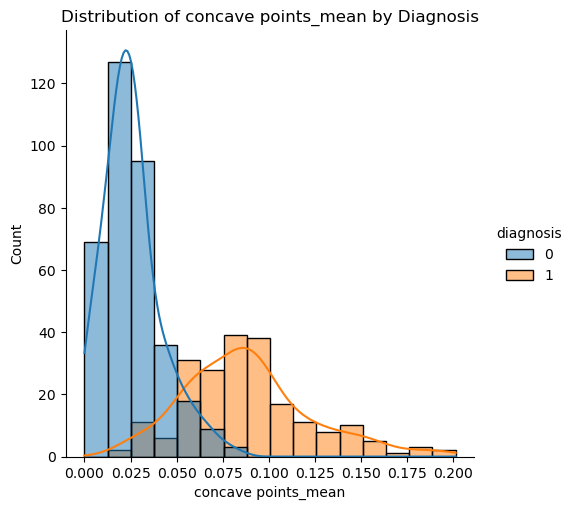

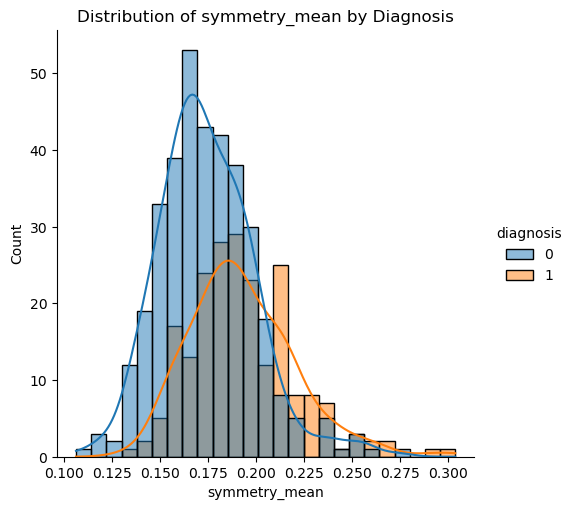

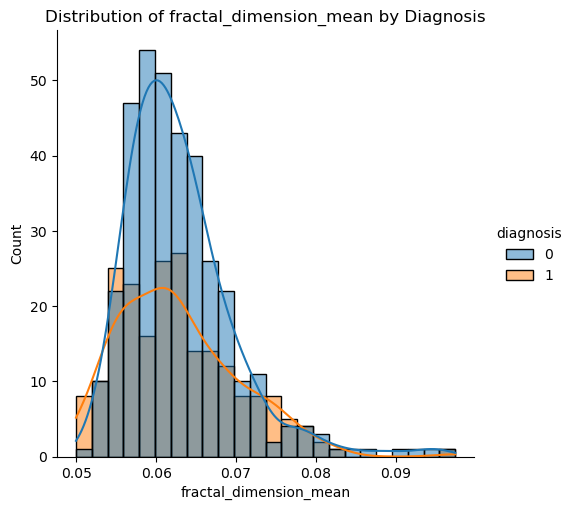

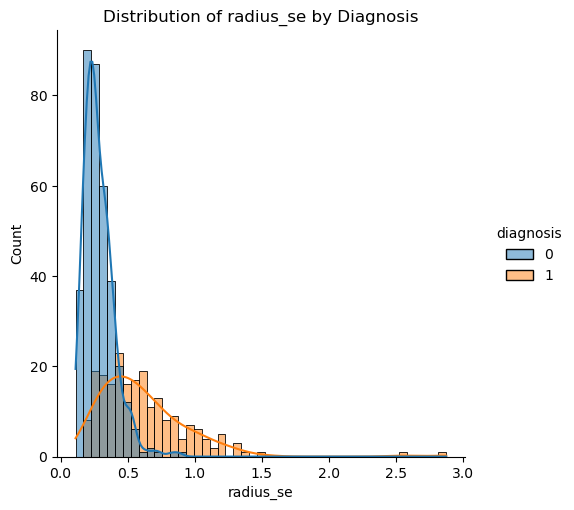

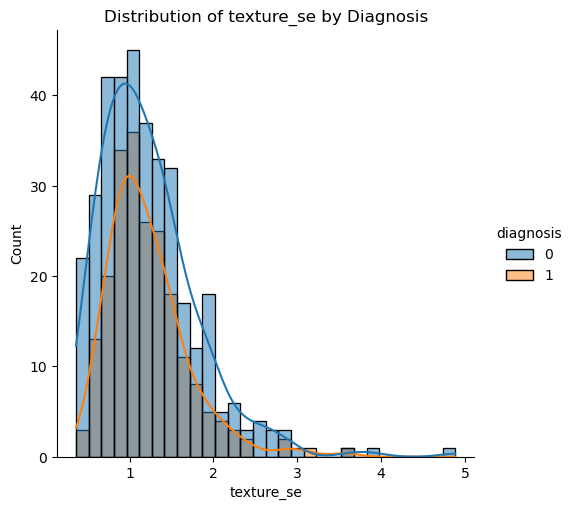

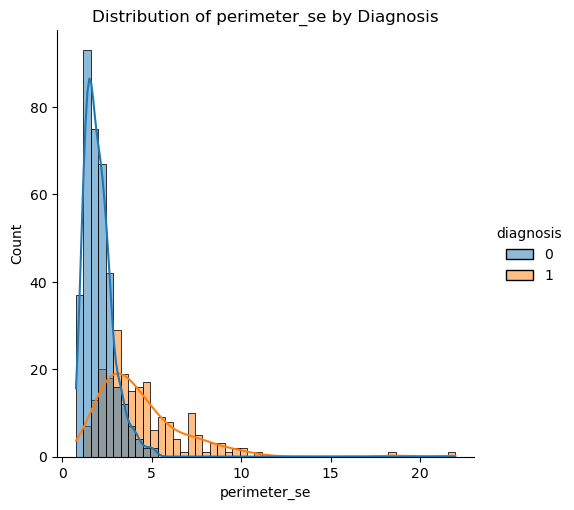

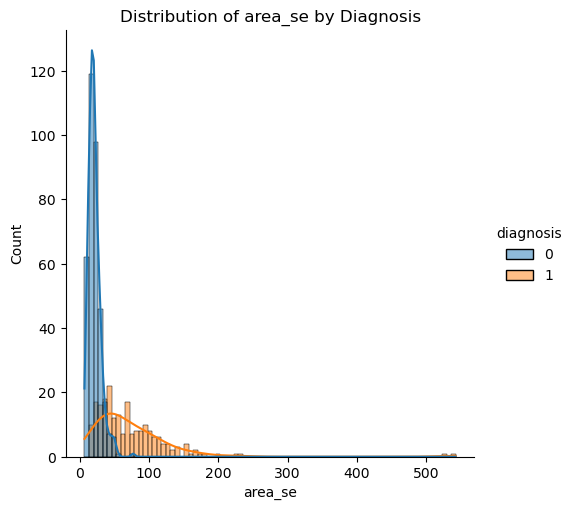

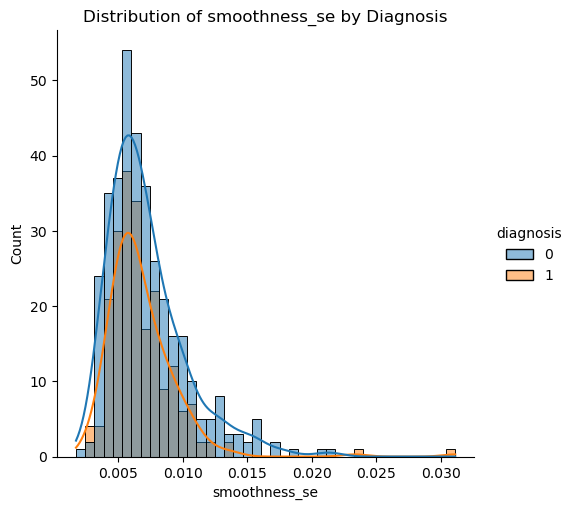

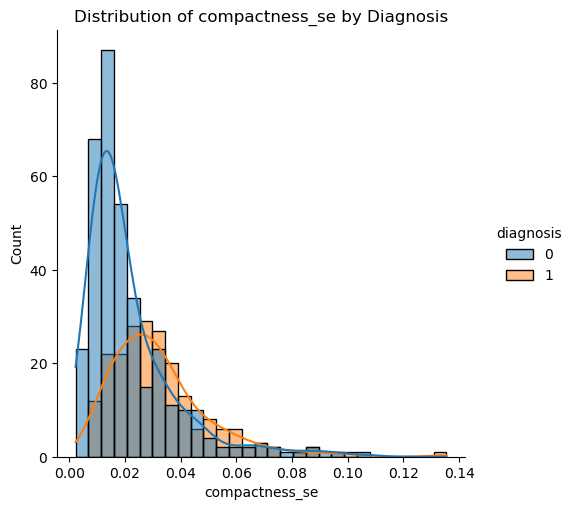

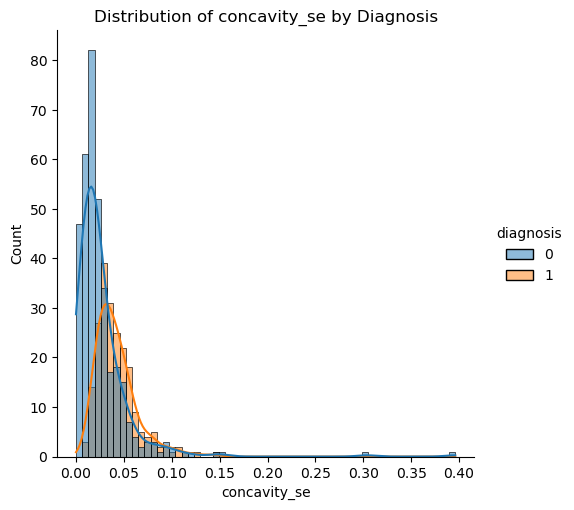

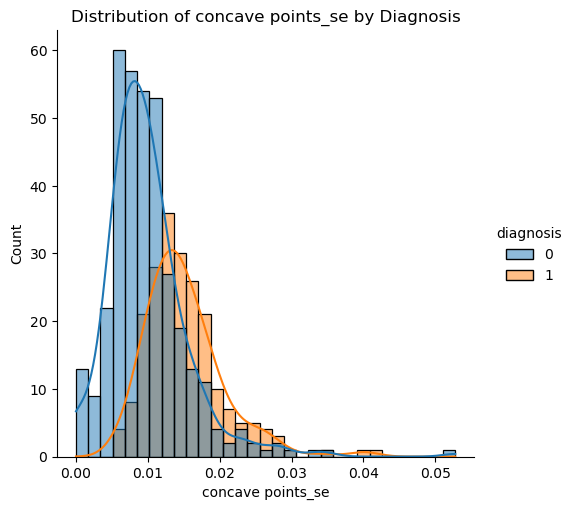

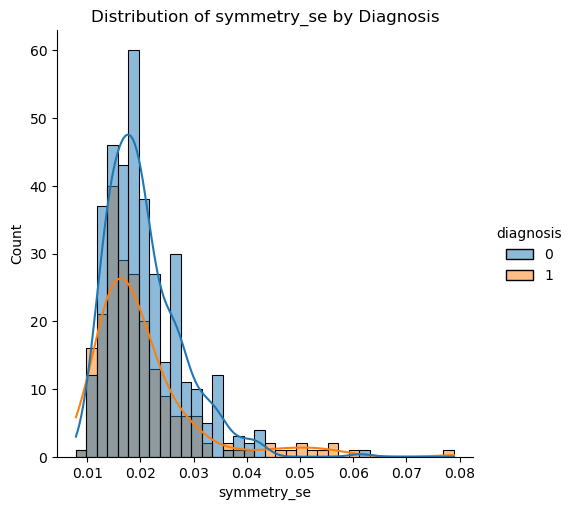

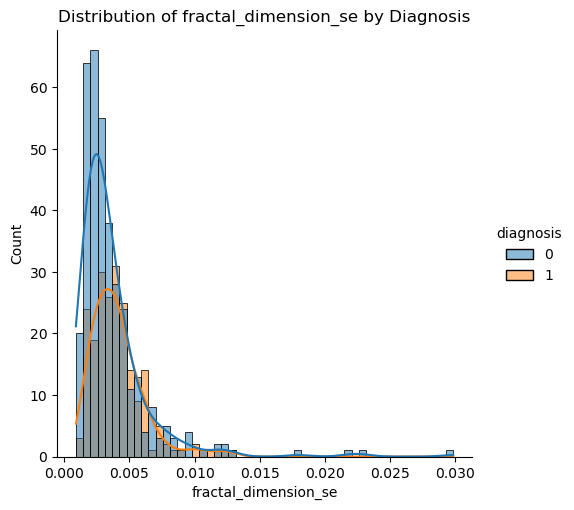

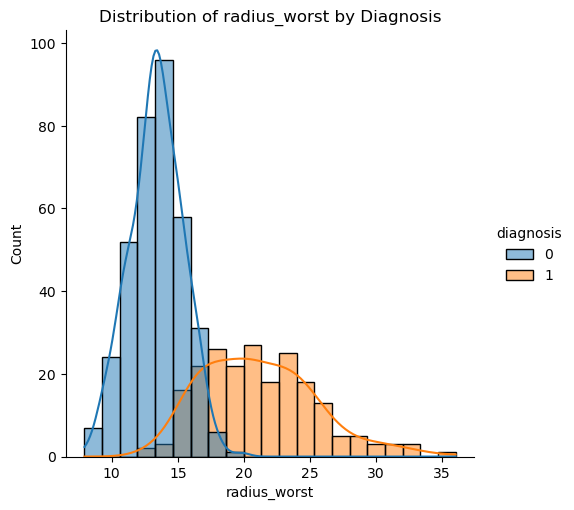

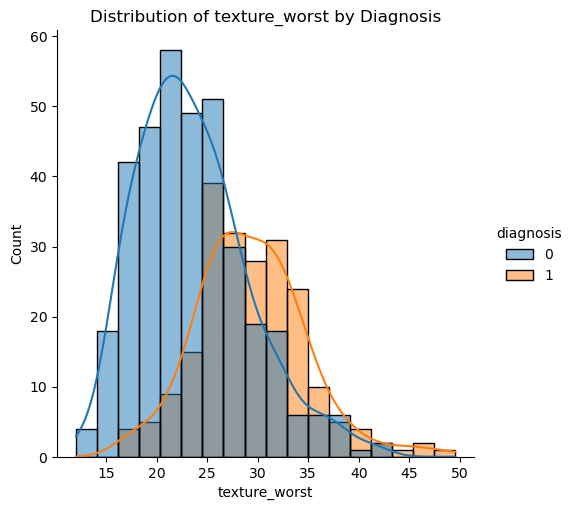

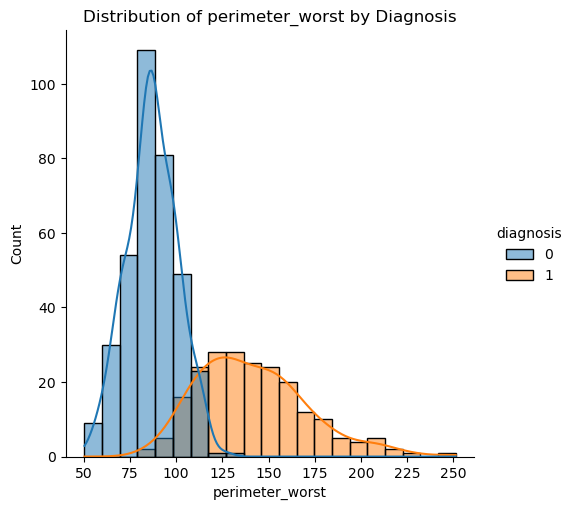

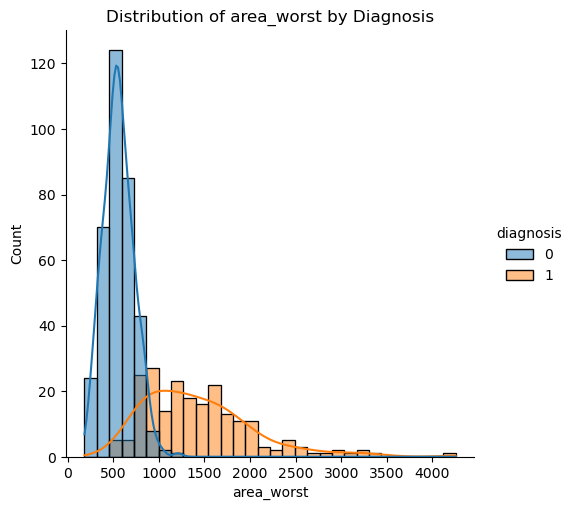

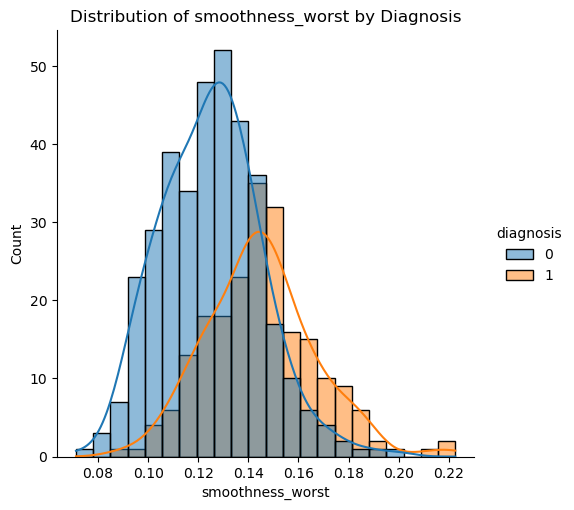

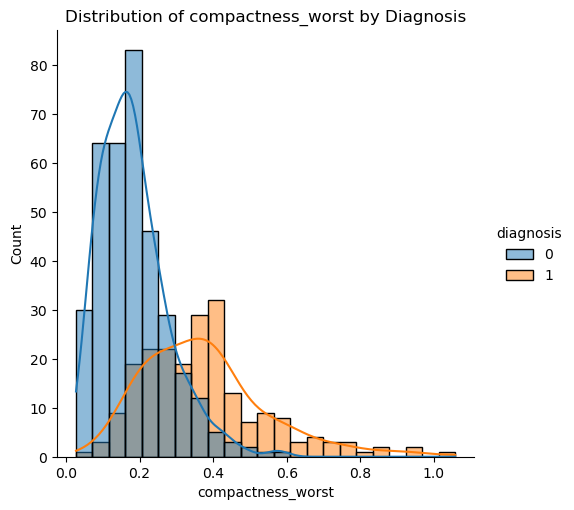

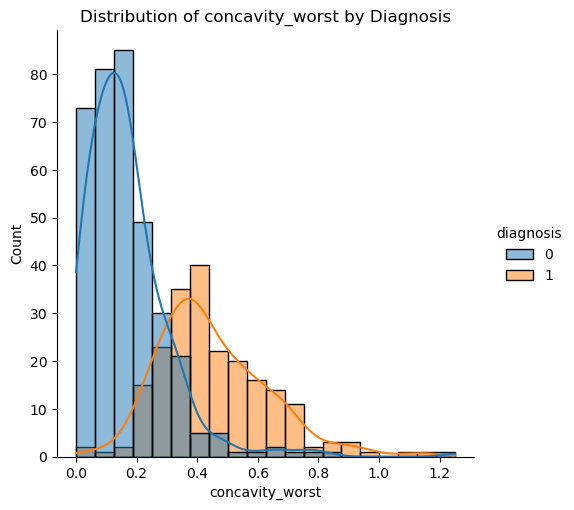

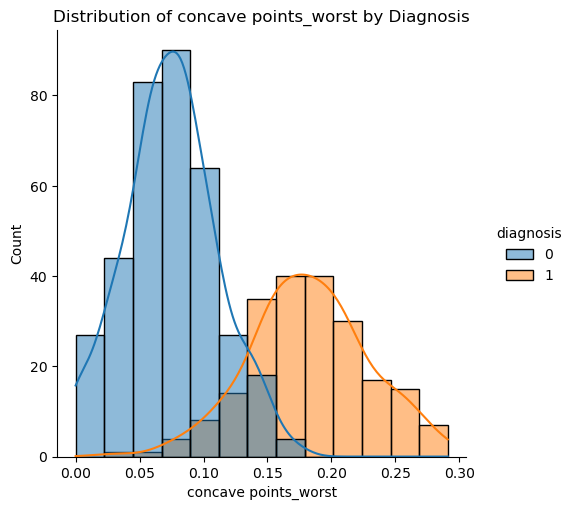

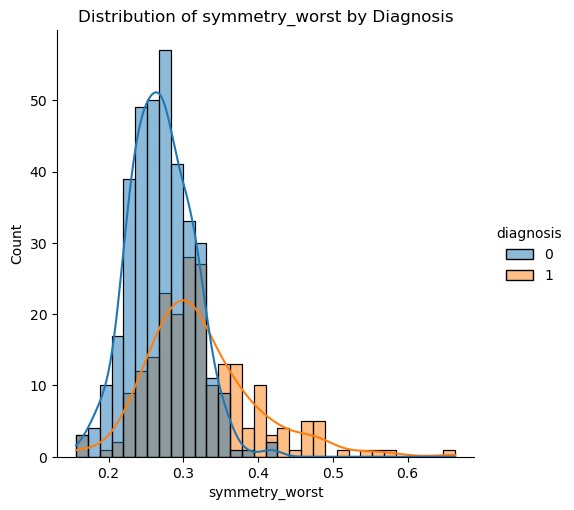

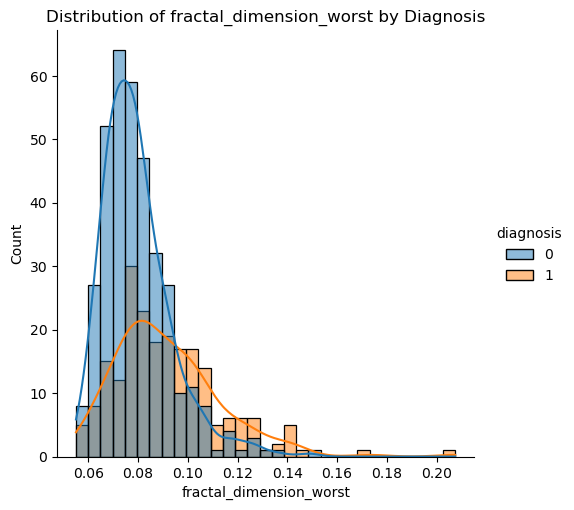

In [49]:
for column in num.columns:
    sns.displot(data=df, x=column, hue='diagnosis', kind='hist', kde=True)
    plt.title(f"Distribution of {column} by Diagnosis")
    plt.show()

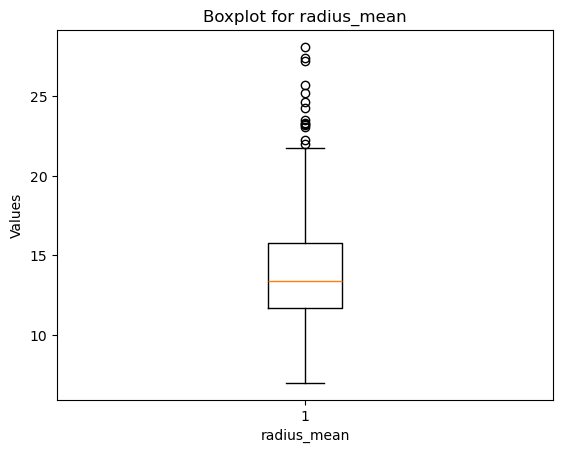

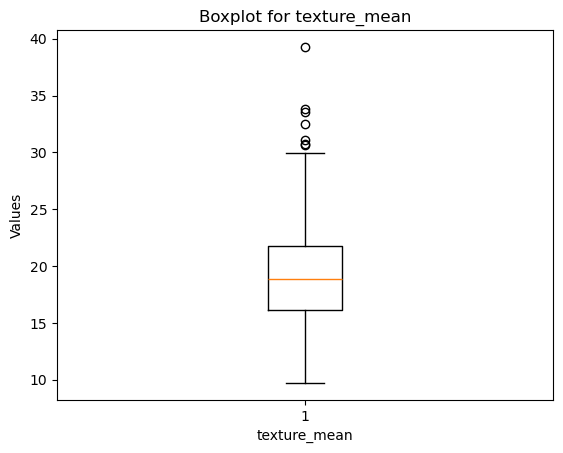

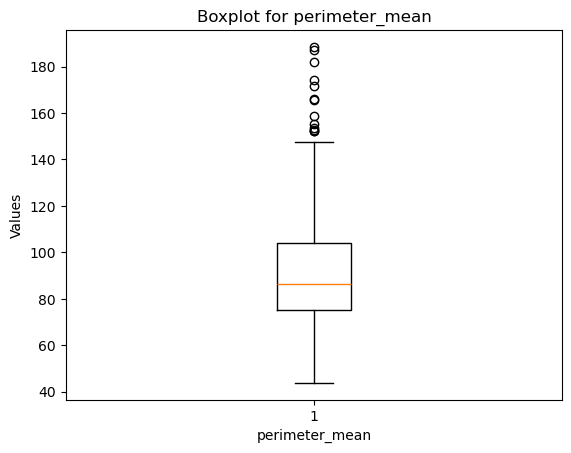

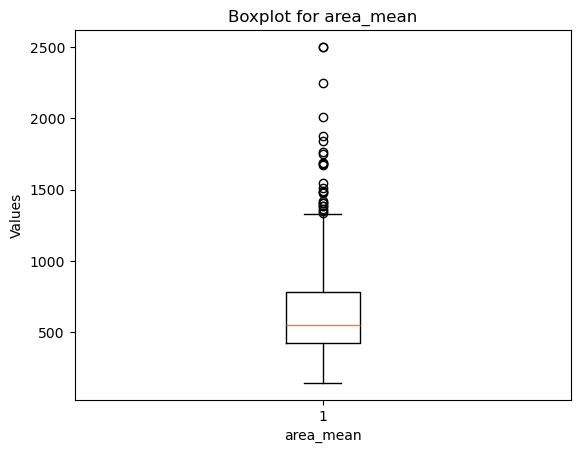

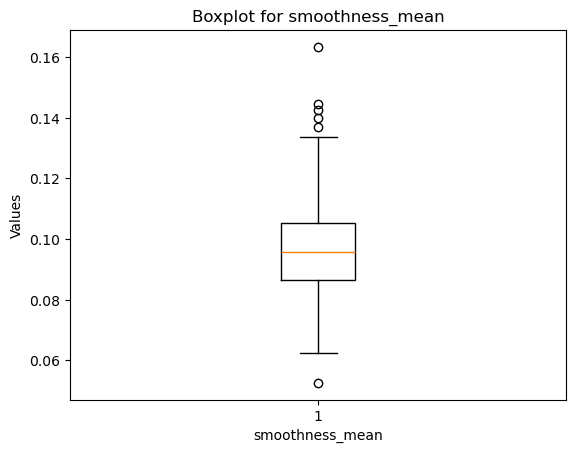

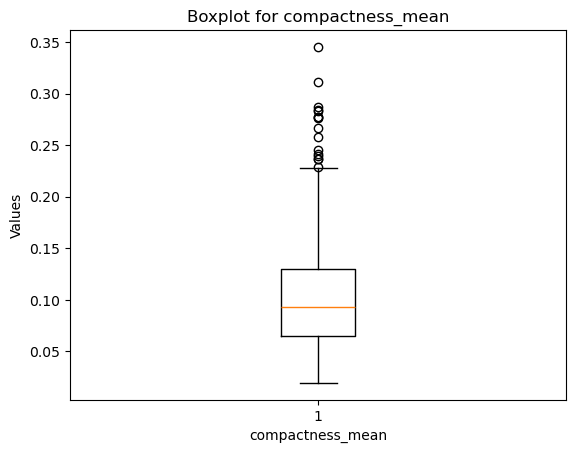

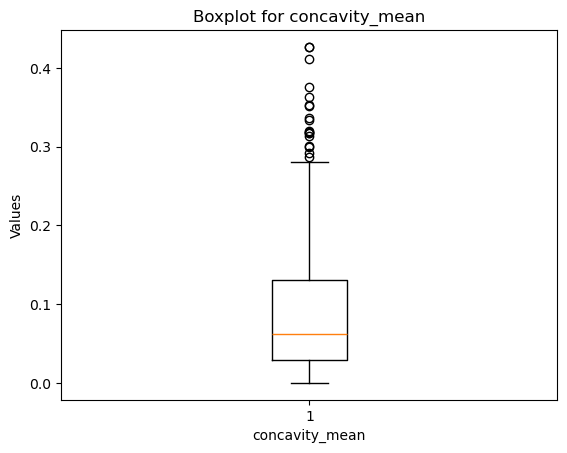

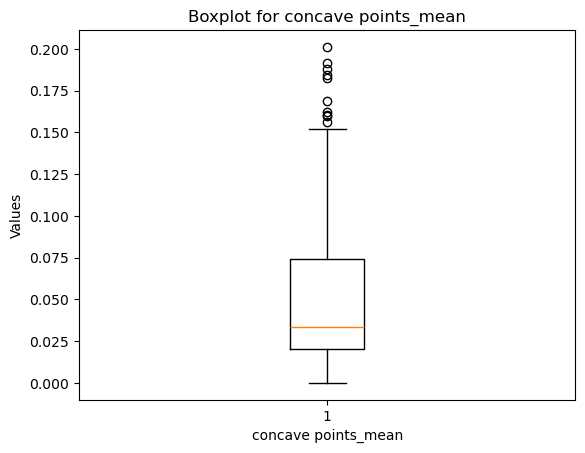

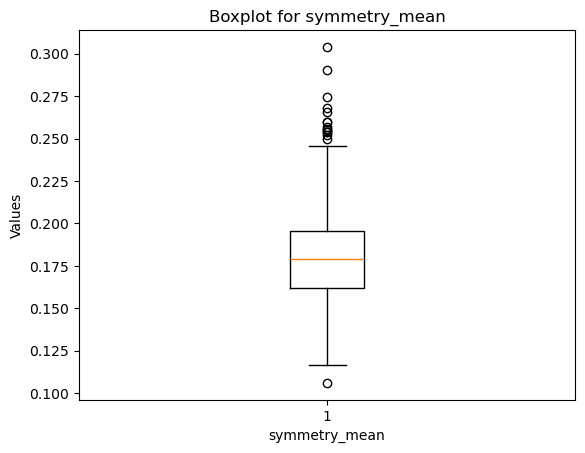

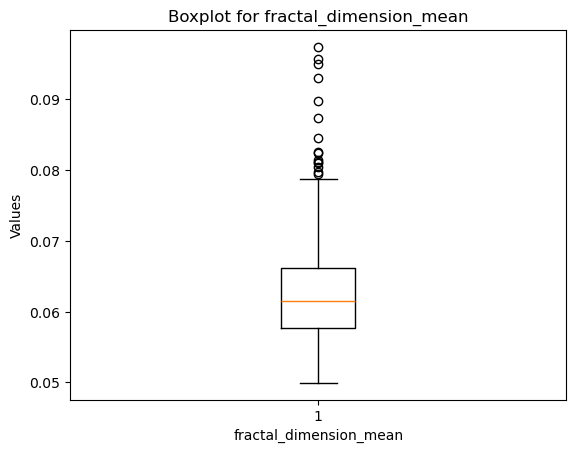

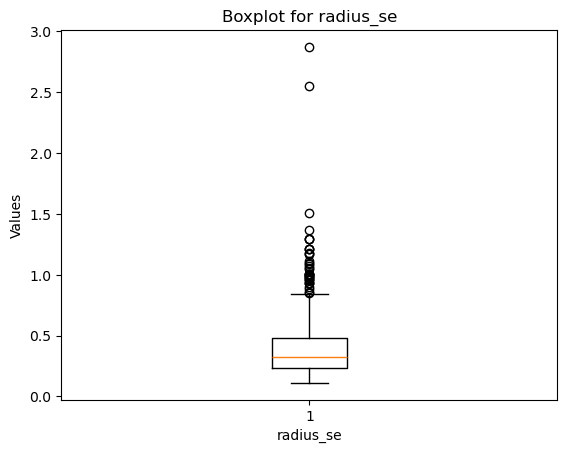

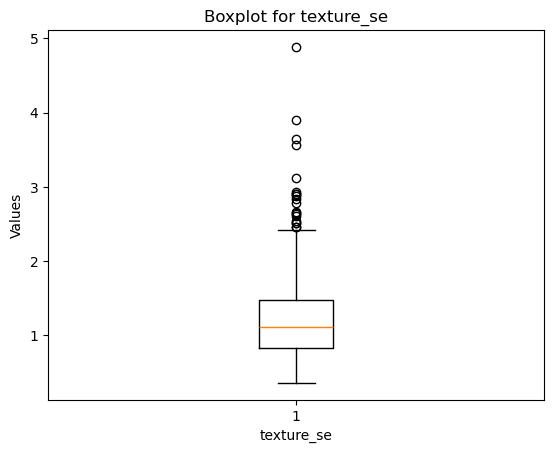

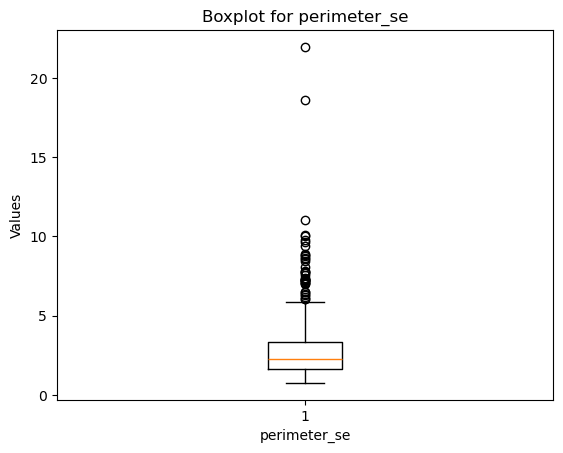

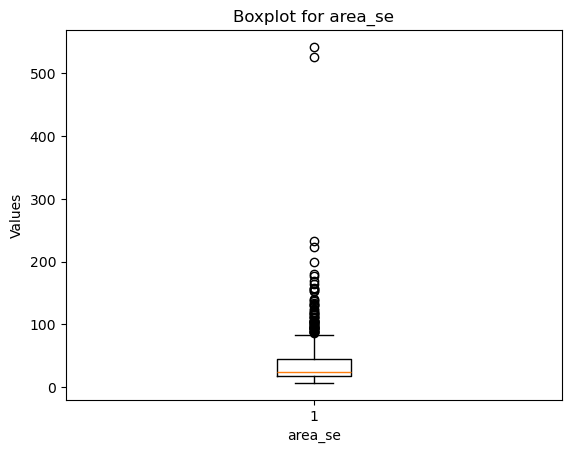

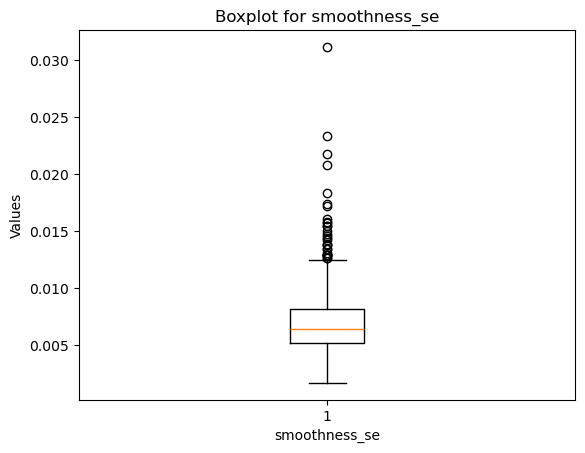

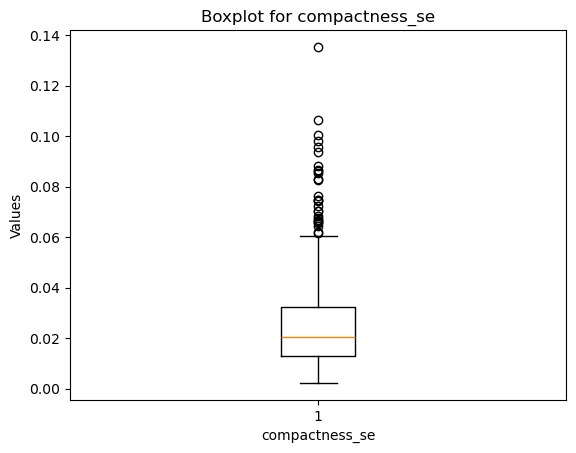

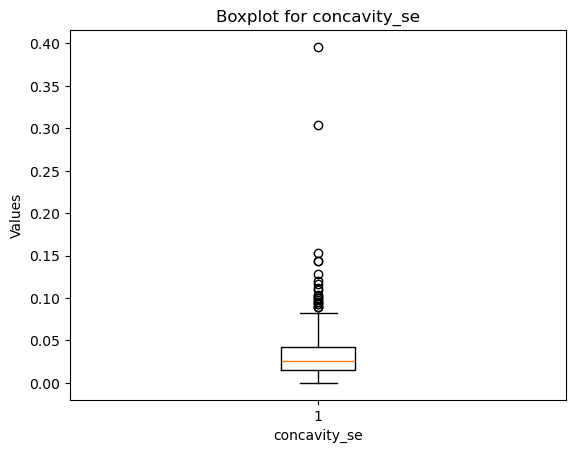

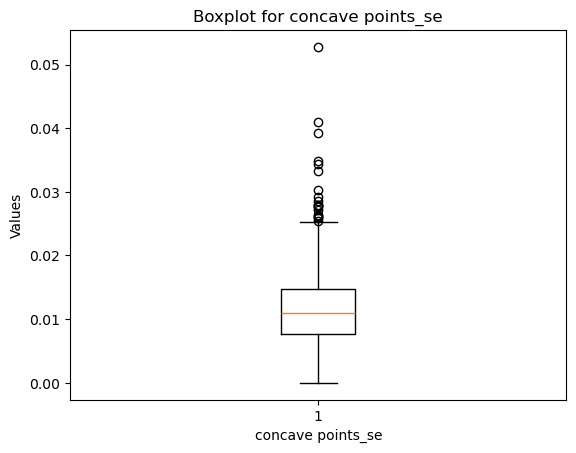

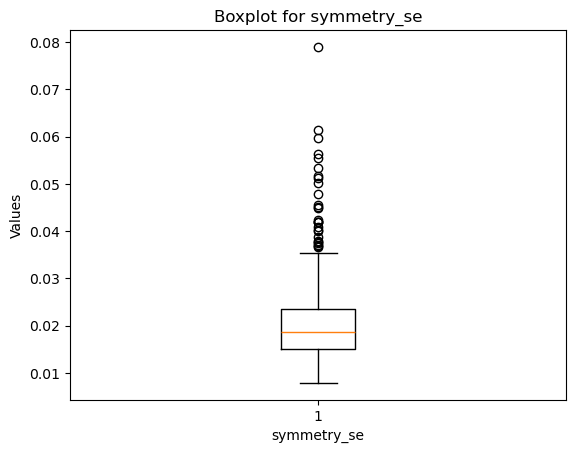

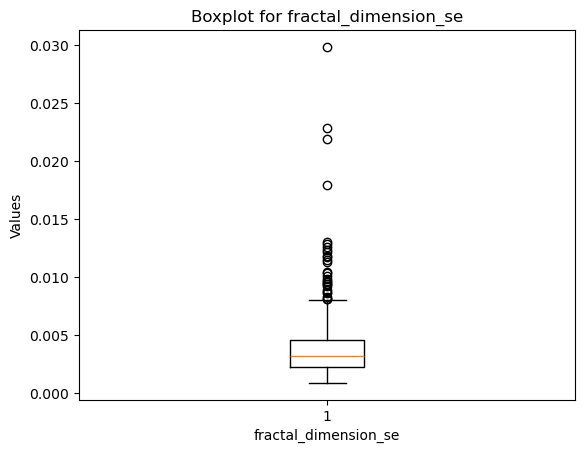

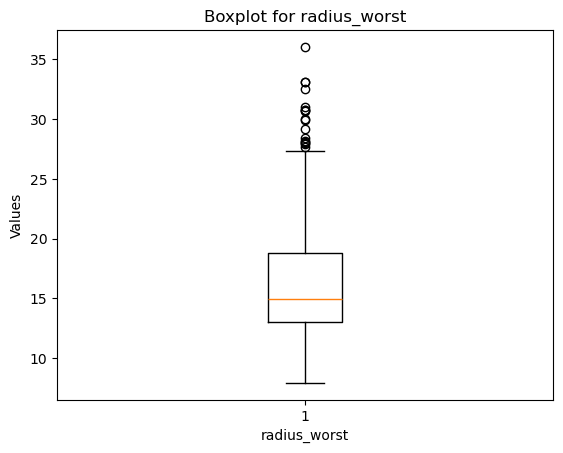

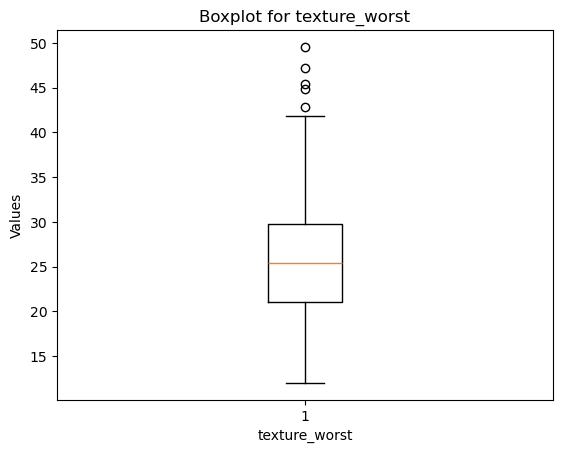

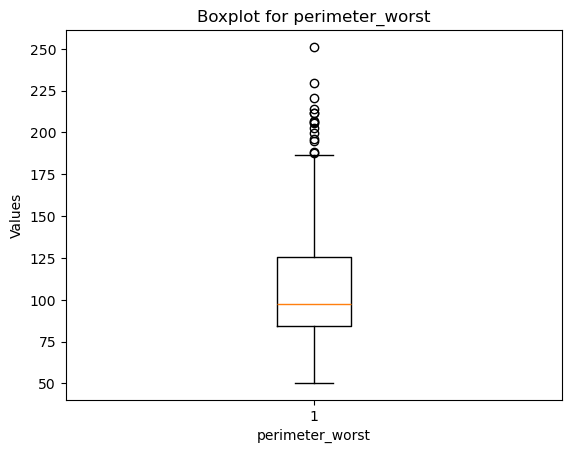

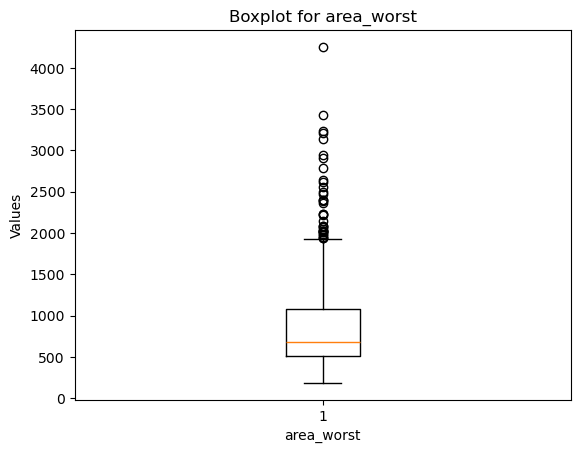

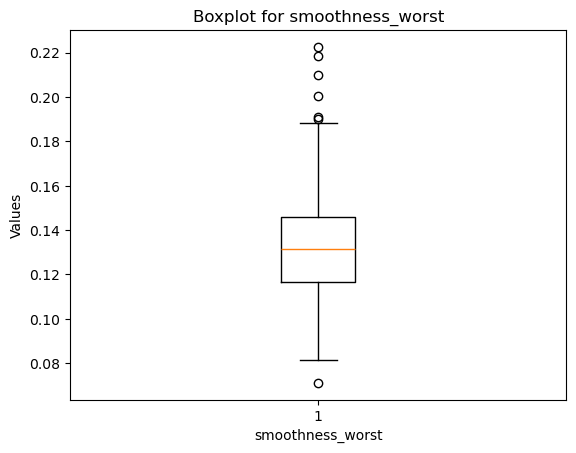

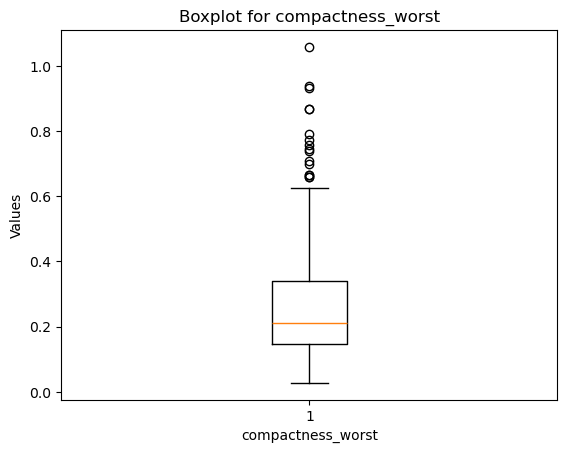

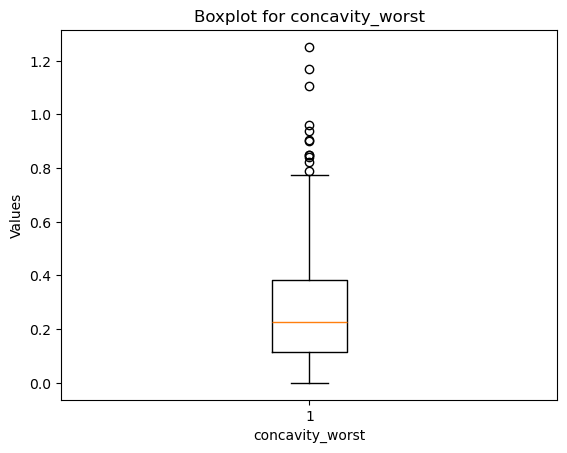

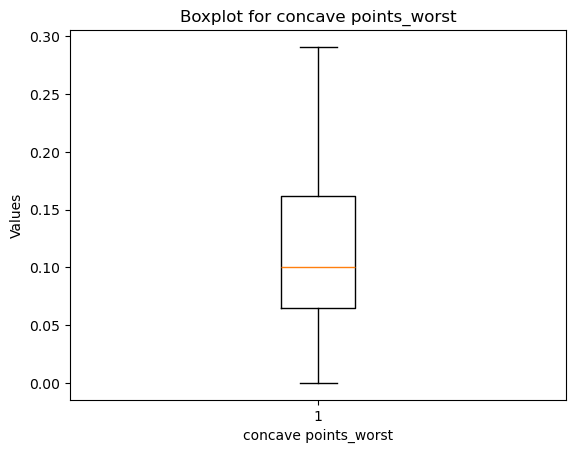

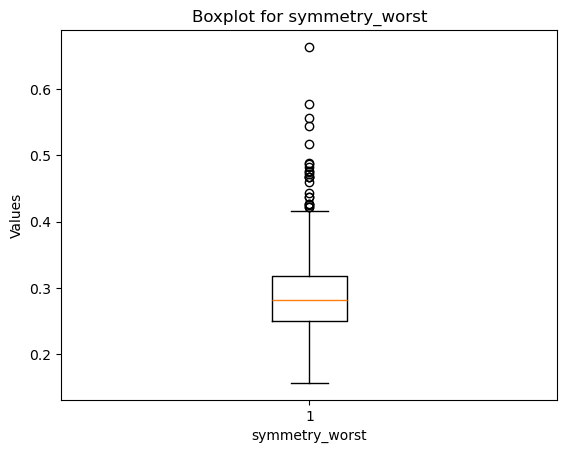

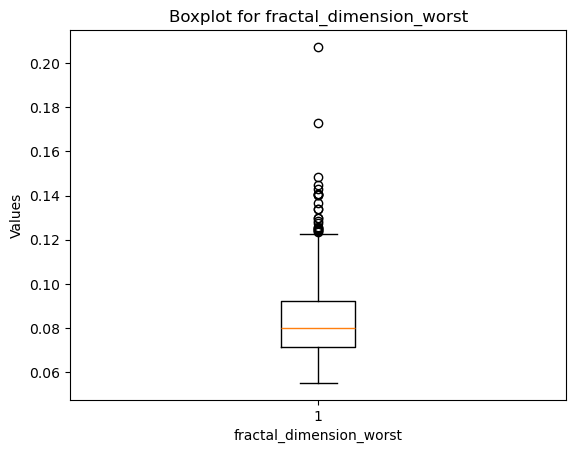

In [50]:
for n in num.columns:
    plt.boxplot(df[n])
    plt.xlabel(n)
    plt.ylabel('Values')
    plt.title(f"Boxplot for {n}")
    plt.show()

In [51]:
lb = LabelEncoder()
df['diagnosis'] = lb.fit_transform(df['diagnosis'])

In [52]:
df['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

In [54]:
dataset=df.drop(columns='diagnosis')

In [55]:
dataset.head(1)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189


<Axes: title={'center': 'Correlated with Diagnosis_M'}>

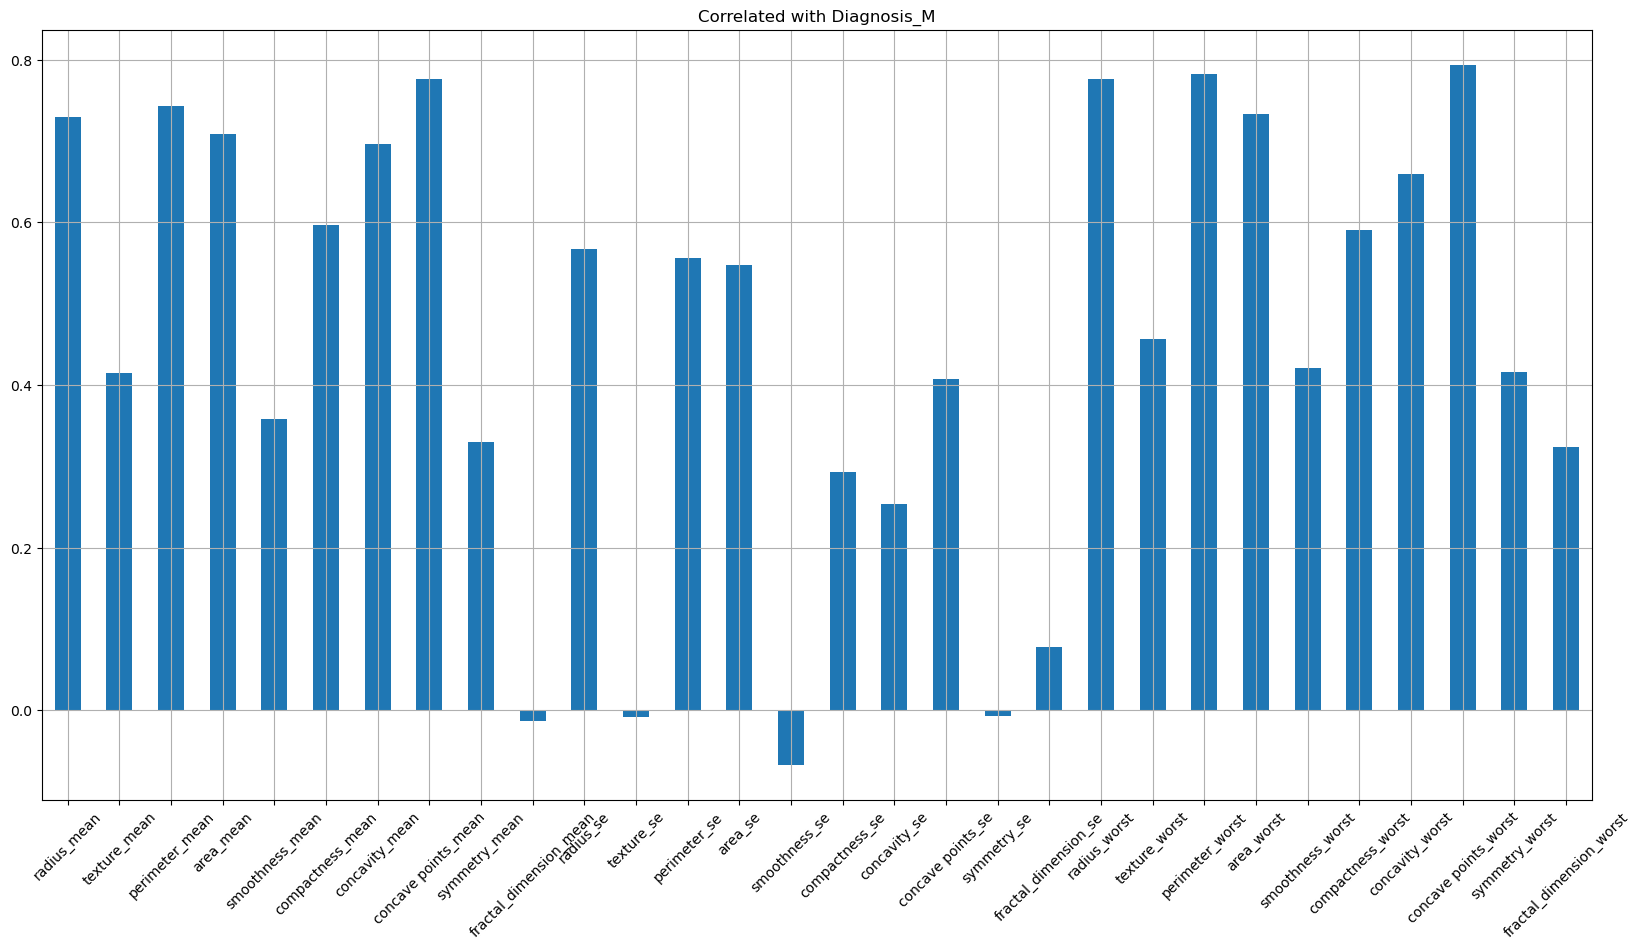

In [56]:
dataset_2.corrwith(df['diagnosis']).plot.bar(
    figsize=(20,10), title='Correlated with Diagnosis_M',rot=45, grid=True)

<Axes: >

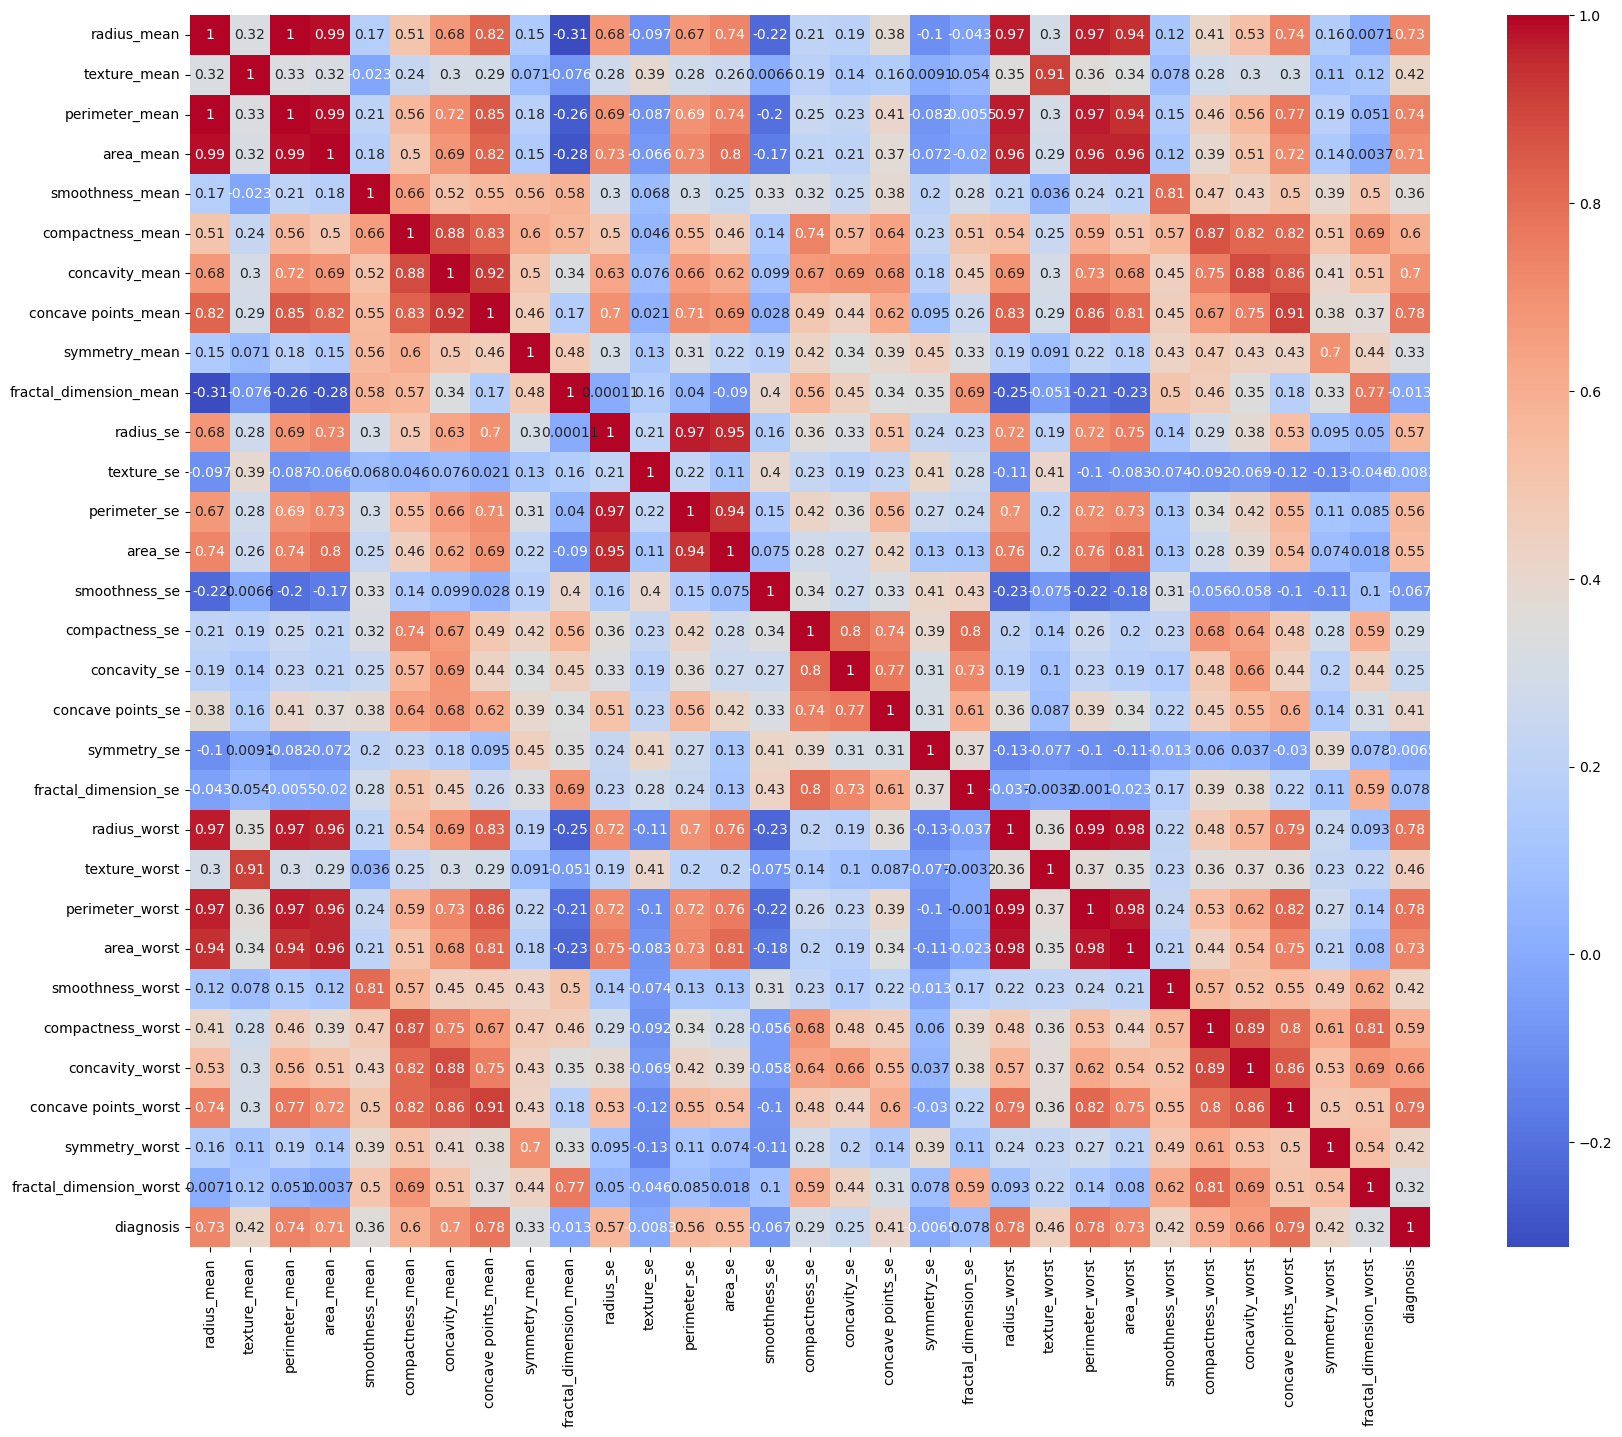

In [58]:
corr=df.corr()

plt.figure(figsize=(20,16))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [60]:
X=df.drop('diagnosis', axis=1)
Y=df['diagnosis']
print(X)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  sym

In [61]:
print(Y)




0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64


In [62]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2, random_state=42)

In [63]:
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


In [64]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [65]:
X_train

array([[-1.44075296, -0.43531947, -1.36208497, ...,  0.9320124 ,
         2.09724217,  1.88645014],
       [ 1.97409619,  1.73302577,  2.09167167, ...,  2.6989469 ,
         1.89116053,  2.49783848],
       [-1.39998202, -1.24962228, -1.34520926, ..., -0.97023893,
         0.59760192,  0.0578942 ],
       ...,
       [ 0.04880192, -0.55500086, -0.06512547, ..., -1.23903365,
        -0.70863864, -1.27145475],
       [-0.03896885,  0.10207345, -0.03137406, ...,  1.05001236,
         0.43432185,  1.21336207],
       [-0.54860557,  0.31327591, -0.60350155, ..., -0.61102866,
        -0.3345212 , -0.84628745]])

In [66]:
lr=LogisticRegression(random_state=0)
lr.fit(X_train,Y_train)

LogisticRegression(random_state=0)

In [67]:
y_pred=lr.predict(X_train)
train_acc=accuracy_score(Y_train,y_pred)

train_acc

0.9868131868131869

In [68]:
y1_pred=lr.predict(X_test)
test_acc=accuracy_score(Y_test,y1_pred)

test_acc

0.9736842105263158

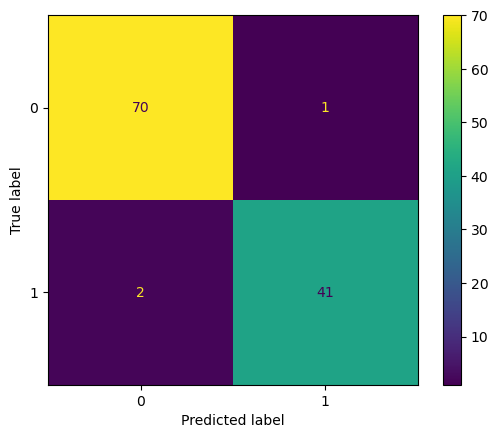

In [70]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf = confusion_matrix(Y_test, y1_pred)
dis = ConfusionMatrixDisplay(conf)
dis.plot()


In [71]:
print(classification_report(Y_test,y1_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [73]:
from sklearn.metrics import f1_score

f1 = f1_score(Y_test, y1_pred)
print(f1)


0.9647058823529412


In [75]:
from sklearn.metrics import precision_score

precision = precision_score(Y_test, y1_pred)
print(precision)


0.9761904761904762


In [78]:
# Step 1: Import the model
from sklearn.linear_model import LogisticRegression

# Step 2: Create the model
lm = LogisticRegression(max_iter=1000)

# Step 3: Train the model
lm.fit(X_train, Y_train)

# Step 4: Predict
y_pred = lm.predict(X_test)
y1_pred = lm.predict(X_train)

# Step 5: Evaluate accuracy
from sklearn.metrics import accuracy_score

train_acc = accuracy_score(Y_train, y1_pred)
test_acc = accuracy_score(Y_test, y_pred)

print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)


Training Accuracy: 0.9868131868131869
Testing Accuracy: 0.9736842105263158


In [80]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate all metrics
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)

# Create DataFrame
import pandas as pd

results1 = pd.DataFrame([['Logistic Regression', train_acc, test_acc, f1, precision, recall]],
                        columns=['Model', 'Train Acc', 'Test Acc', 'F1-score', 'Precision', 'Recall'])

print(results1)


                 Model  Train Acc  Test Acc  F1-score  Precision    Recall
0  Logistic Regression   0.986813  0.973684  0.964706    0.97619  0.953488
